In [29]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
from asgn2.cs231n.classifiers.fc_net import *
from asgn2.cs231n.data_utils import get_CIFAR10_data
from asgn2.cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from asgn2.cs231n.solver import Solver

from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import DataUtils as du
X_train, y_train, P_train, X_val, y_val, P_val, X_test, y_test, P_test = du.loadData()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (18927, 32, 32, 3)
Train labels shape:  (18927,)
Validation data shape:  (5375, 32, 32, 3)
Validation labels shape:  (5375,)
Test data shape:  (2682, 32, 32, 3)
Test labels shape:  (2682,)


In [3]:
data = {}
data['X_train'] = X_train
data['y_train'] = y_train
data['X_val'] = X_val
data['y_val'] = y_val
data['X_test'] = X_test
data['y_test'] = y_test

## Solver - 2 layer network

In [4]:
model = TwoLayerNet(num_classes=20)
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 50% accuracy on the validation set.                                        #
##############################################################################
pass

solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                  'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=5, batch_size=100,
                print_every=100)
solver.train()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(Iteration 1 / 945) loss: 3.002370
(Epoch 0 / 5) train acc: 0.049000; val_acc: 0.044837
(Iteration 101 / 945) loss: 3.030723
(Epoch 1 / 5) train acc: 0.062000; val_acc: 0.058233
(Iteration 201 / 945) loss: 3.041413
(Iteration 301 / 945) loss: 2.931732
(Epoch 2 / 5) train acc: 0.093000; val_acc: 0.096744
(Iteration 401 / 945) loss: 2.951593
(Iteration 501 / 945) loss: 2.969594
(Epoch 3 / 5) train acc: 0.084000; val_acc: 0.101953
(Iteration 601 / 945) loss: 3.004545
(Iteration 701 / 945) loss: 3.242924
(Epoch 4 / 5) train acc: 0.109000; val_acc: 0.109581
(Iteration 801 / 945) loss: 2.844638
(Iteration 901 / 945) loss: 2.894635
(Epoch 5 / 5) train acc: 0.110000; val_acc: 0.105116


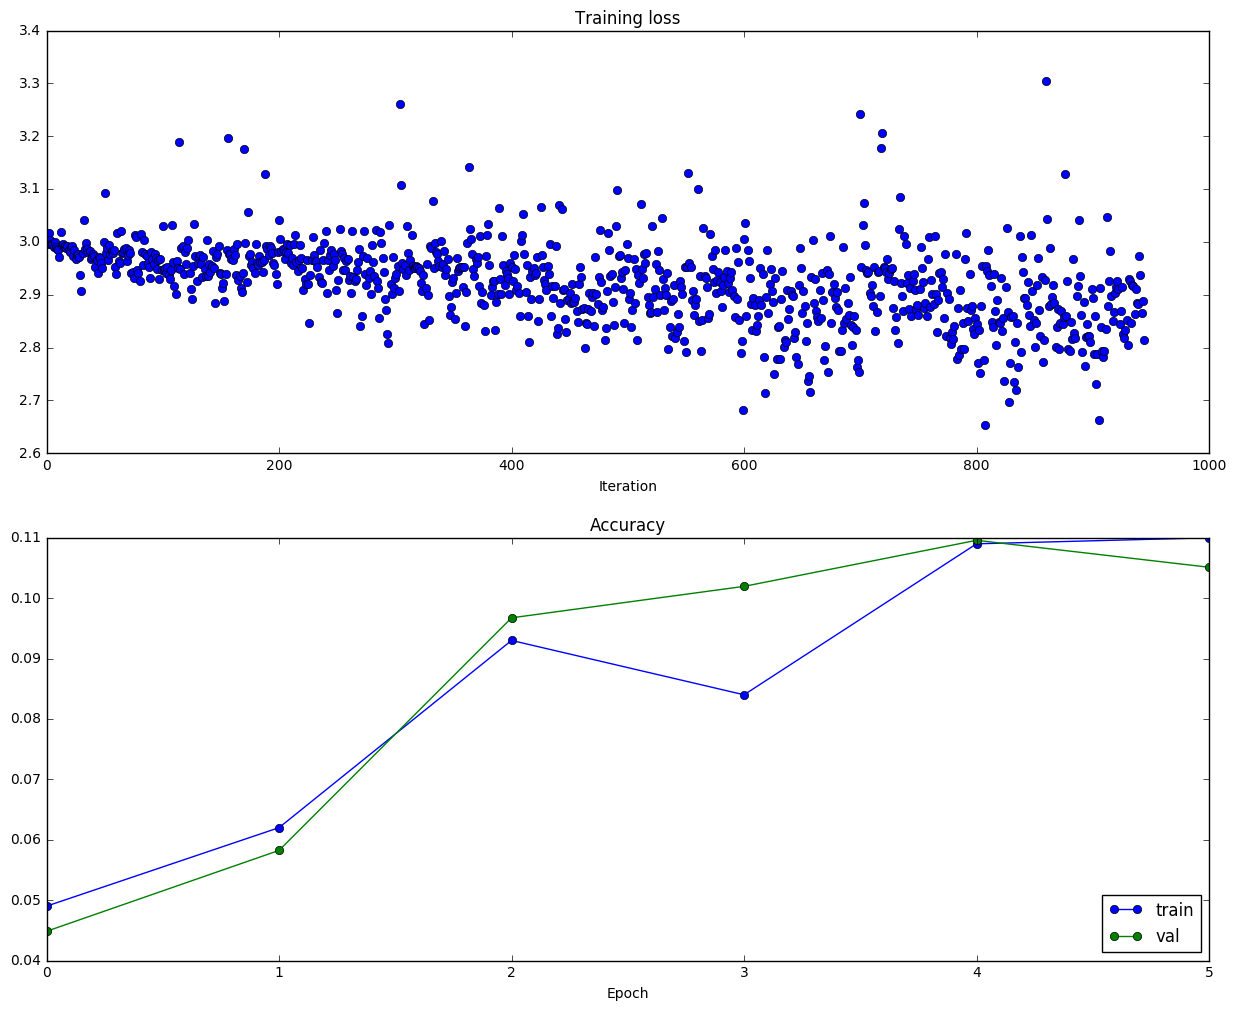

In [5]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
#plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer Network

## Sanity Check [Very Small Data]

In [6]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 20
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
  print('Running check with reg = ', reg)
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

  loss, grads = model.loss(X, y)
  print('Initial loss: ', loss)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Running check with reg =  0
Initial loss:  2.99715555706
W1 relative error: 5.09e-07
W2 relative error: 2.19e-07
W3 relative error: 1.25e-06
b1 relative error: 4.94e-08
b2 relative error: 2.38e-09
b3 relative error: 2.86e-10
Running check with reg =  3.14
Initial loss:  8.69314554215
W1 relative error: 4.65e-08
W2 relative error: 5.17e-06
W3 relative error: 6.81e-08
b1 relative error: 4.37e-08
b2 relative error: 2.13e-08
b3 relative error: 9.22e-10


In [7]:
num_train = 50
r = np.random.choice(len(data['X_train']), num_train, replace=False)
print(r)
small_data = {
  'X_train': data['X_train'][r],
  'y_train': data['y_train'][r],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

[ 8692  5927  8944  5709 18037  7989 11688  8284  2255 10800 10776  6166
 15849  2486  1235  4551  3322  9072   141 13883  8783  3147   286 15991
  2113 13888  2175 14742  2765 17564  9163  6370   319  8312  2100 13324
  3846  4521 14724 17293  7516 14984 12376   962 16500 17890  3956  7857
 18199   314]


In [8]:
print(small_data['X_train'].shape)
print(small_data['y_train'].shape)
print(small_data['X_val'].shape)
print(small_data['y_val'].shape)

(50, 32, 32, 3)
(50,)
(5375, 32, 32, 3)
(5375,)


In [9]:
#plt.imshow(small_data['X_train'][1].astype('uint8'))
#print(small_data['y_train'][1])

### Overfit 2 layer network 

- use_batchnorm was absolutely critical to overfitting the network!

In [10]:
weight_scale = 5e-2
learning_rate = 1e-2
model = FullyConnectedNet([100, 100], num_classes=20, 
                          weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

bn_model = FullyConnectedNet([100, 100], num_classes=20, use_batchnorm=True,
                          weight_scale=weight_scale, dtype=np.float64)

bn_solver = Solver(bn_model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
bn_solver.train()


(Iteration 1 / 40) loss: 129.254310
(Epoch 0 / 20) train acc: 0.140000; val_acc: 0.056930
(Epoch 1 / 20) train acc: 0.120000; val_acc: 0.061209
(Epoch 2 / 20) train acc: 0.080000; val_acc: 0.046698
(Epoch 3 / 20) train acc: 0.080000; val_acc: 0.047256
(Epoch 4 / 20) train acc: 0.080000; val_acc: 0.047256
(Epoch 5 / 20) train acc: 0.080000; val_acc: 0.050791
(Iteration 11 / 40) loss: 2.994673
(Epoch 6 / 20) train acc: 0.080000; val_acc: 0.050791
(Epoch 7 / 20) train acc: 0.080000; val_acc: 0.050791
(Epoch 8 / 20) train acc: 0.140000; val_acc: 0.059907
(Epoch 9 / 20) train acc: 0.140000; val_acc: 0.059907
(Epoch 10 / 20) train acc: 0.140000; val_acc: 0.059907
(Iteration 21 / 40) loss: 2.992731
(Epoch 11 / 20) train acc: 0.140000; val_acc: 0.059907
(Epoch 12 / 20) train acc: 0.140000; val_acc: 0.059907
(Epoch 13 / 20) train acc: 0.140000; val_acc: 0.059907
(Epoch 14 / 20) train acc: 0.140000; val_acc: 0.059907
(Epoch 15 / 20) train acc: 0.140000; val_acc: 0.059907
(Iteration 31 / 40) loss

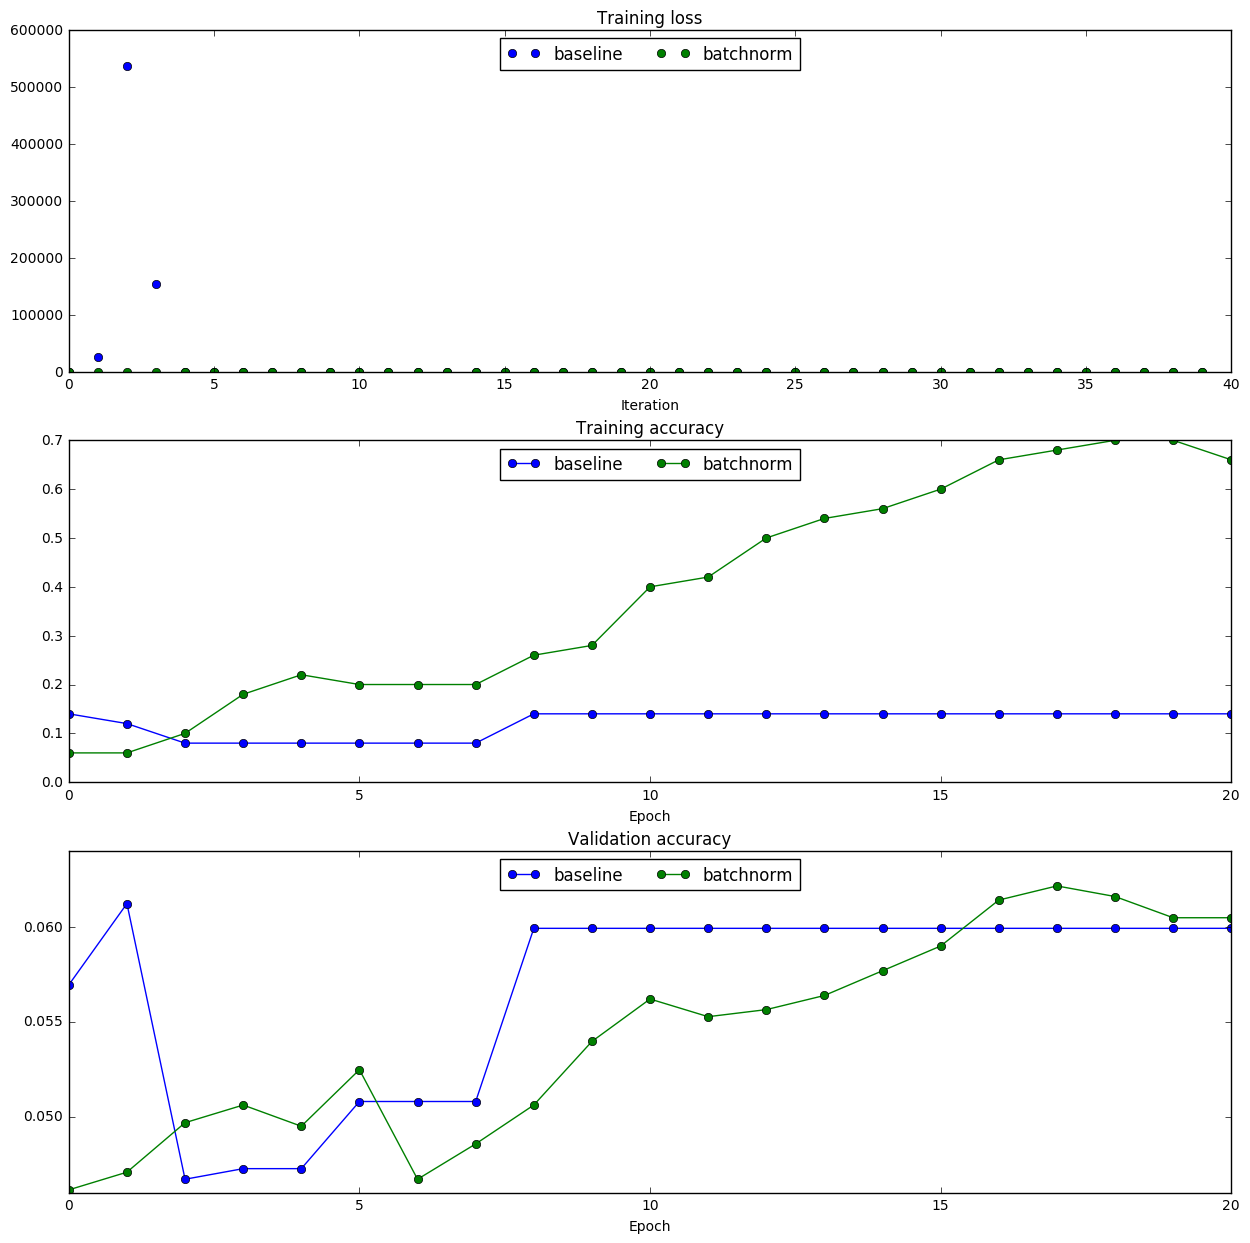

In [11]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(solver.loss_history, 'o', label='baseline')
plt.plot(bn_solver.loss_history, 'o', label='batchnorm')

plt.subplot(3, 1, 2)
plt.plot(solver.train_acc_history, '-o', label='baseline')
plt.plot(bn_solver.train_acc_history, '-o', label='batchnorm')

plt.subplot(3, 1, 3)
plt.plot(solver.val_acc_history, '-o', label='baseline')
plt.plot(bn_solver.val_acc_history, '-o', label='batchnorm')
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

#### Study the interaction of batch normalization and weight initialization.

##### (with SGD)

Running weight scale 1 / 20
Running weight scale 2 / 20
Running weight scale 3 / 20
Running weight scale 4 / 20
Running weight scale 5 / 20
Running weight scale 6 / 20
Running weight scale 7 / 20
Running weight scale 8 / 20
Running weight scale 9 / 20
Running weight scale 10 / 20
Running weight scale 11 / 20
Running weight scale 12 / 20
Running weight scale 13 / 20
Running weight scale 14 / 20
Running weight scale 15 / 20
Running weight scale 16 / 20
Running weight scale 17 / 20
Running weight scale 18 / 20
Running weight scale 19 / 20
Running weight scale 20 / 20


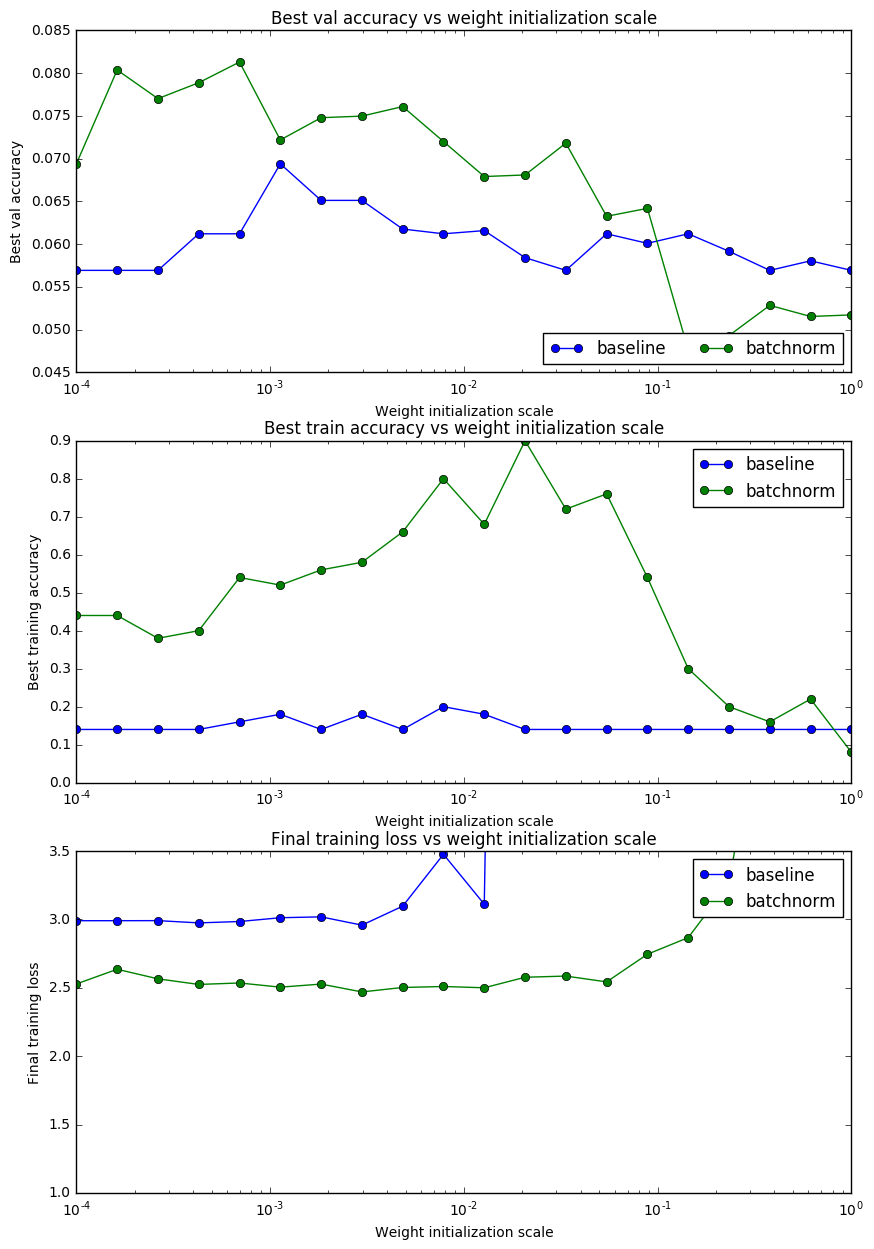

In [12]:
np.random.seed(231)
# Try training a very deep net with batchnorm
hidden_dims = [100,100]

bn_solvers = {}
solvers = {}

weight_scales = np.logspace(-4, 0, num=20)

for i, weight_scale in enumerate(weight_scales):
  print('Running weight scale %d / %d' % (i + 1, len(weight_scales)))
  bn_model = FullyConnectedNet(hidden_dims, weight_scale=weight_scale, use_batchnorm=True, num_classes=20)
  model = FullyConnectedNet(hidden_dims, weight_scale=weight_scale, use_batchnorm=False, num_classes=20)

  bn_solver = Solver(bn_model, small_data,
                num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': 1e-2,
                },
                verbose=False, print_every=200)
  bn_solver.train()
  bn_solvers[weight_scale] = bn_solver

  solver = Solver(model, small_data,
                  num_epochs=20, batch_size=25,
                  update_rule='sgd',
                  optim_config={
                      'learning_rate': 1e-2,
                  },
                  verbose=False, print_every=200)
  solver.train()
  solvers[weight_scale] = solver

# Plot results of weight scale experiment
best_train_accs, bn_best_train_accs = [], []
best_val_accs, bn_best_val_accs = [], []
final_train_loss, bn_final_train_loss = [], []

for ws in weight_scales:
  best_train_accs.append(max(solvers[ws].train_acc_history))
  bn_best_train_accs.append(max(bn_solvers[ws].train_acc_history))
  
  best_val_accs.append(max(solvers[ws].val_acc_history))
  bn_best_val_accs.append(max(bn_solvers[ws].val_acc_history))
  
  final_train_loss.append(np.mean(solvers[ws].loss_history[-100:]))
  bn_final_train_loss.append(np.mean(bn_solvers[ws].loss_history[-100:]))
  
plt.subplot(3, 1, 1)
plt.title('Best val accuracy vs weight initialization scale')
plt.xlabel('Weight initialization scale')
plt.ylabel('Best val accuracy')
plt.semilogx(weight_scales, best_val_accs, '-o', label='baseline')
plt.semilogx(weight_scales, bn_best_val_accs, '-o', label='batchnorm')
plt.legend(ncol=2, loc='lower right')

plt.subplot(3, 1, 2)
plt.title('Best train accuracy vs weight initialization scale')
plt.xlabel('Weight initialization scale')
plt.ylabel('Best training accuracy')
plt.semilogx(weight_scales, best_train_accs, '-o', label='baseline')
plt.semilogx(weight_scales, bn_best_train_accs, '-o', label='batchnorm')
plt.legend()

plt.subplot(3, 1, 3)
plt.title('Final training loss vs weight initialization scale')
plt.xlabel('Weight initialization scale')
plt.ylabel('Final training loss')
plt.semilogx(weight_scales, final_train_loss, '-o', label='baseline')
plt.semilogx(weight_scales, bn_final_train_loss, '-o', label='batchnorm')
plt.legend()
plt.gca().set_ylim(1.0, 3.5)

plt.gcf().set_size_inches(10, 15)
plt.show()

##### (with Adam)

Running weight scale 1 / 20
Running weight scale 2 / 20
Running weight scale 3 / 20
Running weight scale 4 / 20
Running weight scale 5 / 20
Running weight scale 6 / 20
Running weight scale 7 / 20
Running weight scale 8 / 20
Running weight scale 9 / 20
Running weight scale 10 / 20
Running weight scale 11 / 20
Running weight scale 12 / 20
Running weight scale 13 / 20
Running weight scale 14 / 20
Running weight scale 15 / 20
Running weight scale 16 / 20
Running weight scale 17 / 20
Running weight scale 18 / 20
Running weight scale 19 / 20
Running weight scale 20 / 20


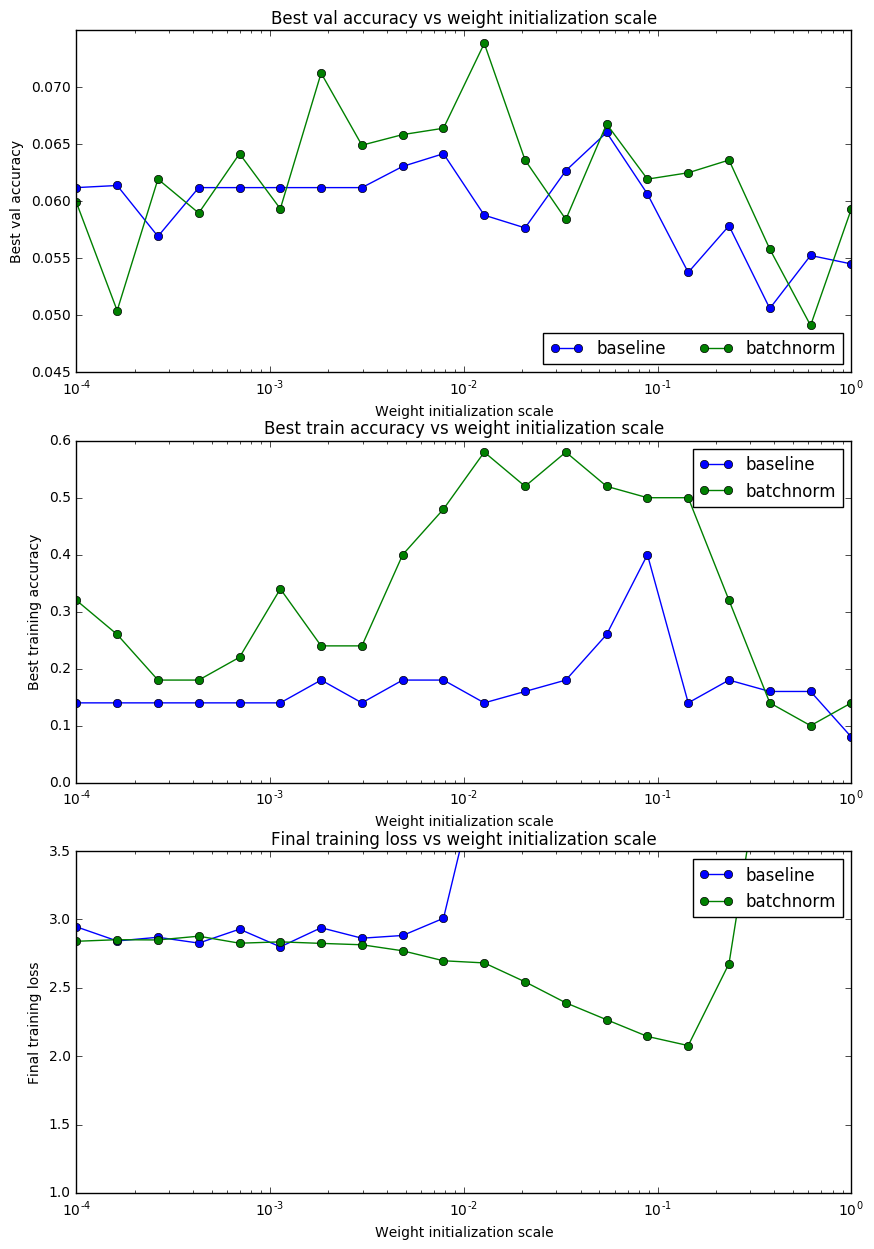

In [13]:
np.random.seed(231)
# Try training a very deep net with batchnorm
hidden_dims = [100,100]

bn_solvers = {}
solvers = {}

weight_scales = np.logspace(-4, 0, num=20)

for i, weight_scale in enumerate(weight_scales):
  print('Running weight scale %d / %d' % (i + 1, len(weight_scales)))
  bn_model = FullyConnectedNet(hidden_dims, weight_scale=weight_scale, use_batchnorm=True, num_classes=20)
  model = FullyConnectedNet(hidden_dims, weight_scale=weight_scale, use_batchnorm=False, num_classes=20)

  bn_solver = Solver(bn_model, small_data,
                  num_epochs=10, batch_size=50,
                  update_rule='adam',
                  optim_config={
                    'learning_rate': 1e-3,
                  },
                  verbose=False, print_every=200)
  bn_solver.train()
  bn_solvers[weight_scale] = bn_solver

  solver = Solver(model, small_data,
                  num_epochs=10, batch_size=50,
                  update_rule='adam',
                  optim_config={
                    'learning_rate': 1e-3,
                  },
                  verbose=False, print_every=200)
  solver.train()
  solvers[weight_scale] = solver

# Plot results of weight scale experiment
best_train_accs, bn_best_train_accs = [], []
best_val_accs, bn_best_val_accs = [], []
final_train_loss, bn_final_train_loss = [], []

for ws in weight_scales:
  best_train_accs.append(max(solvers[ws].train_acc_history))
  bn_best_train_accs.append(max(bn_solvers[ws].train_acc_history))
  
  best_val_accs.append(max(solvers[ws].val_acc_history))
  bn_best_val_accs.append(max(bn_solvers[ws].val_acc_history))
  
  final_train_loss.append(np.mean(solvers[ws].loss_history[-100:]))
  bn_final_train_loss.append(np.mean(bn_solvers[ws].loss_history[-100:]))
  
plt.subplot(3, 1, 1)
plt.title('Best val accuracy vs weight initialization scale')
plt.xlabel('Weight initialization scale')
plt.ylabel('Best val accuracy')
plt.semilogx(weight_scales, best_val_accs, '-o', label='baseline')
plt.semilogx(weight_scales, bn_best_val_accs, '-o', label='batchnorm')
plt.legend(ncol=2, loc='lower right')

plt.subplot(3, 1, 2)
plt.title('Best train accuracy vs weight initialization scale')
plt.xlabel('Weight initialization scale')
plt.ylabel('Best training accuracy')
plt.semilogx(weight_scales, best_train_accs, '-o', label='baseline')
plt.semilogx(weight_scales, bn_best_train_accs, '-o', label='batchnorm')
plt.legend()

plt.subplot(3, 1, 3)
plt.title('Final training loss vs weight initialization scale')
plt.xlabel('Weight initialization scale')
plt.ylabel('Final training loss')
plt.semilogx(weight_scales, final_train_loss, '-o', label='baseline')
plt.semilogx(weight_scales, bn_final_train_loss, '-o', label='batchnorm')
plt.legend()
plt.gca().set_ylim(1.0, 3.5)

plt.gcf().set_size_inches(10, 15)
plt.show()

### Overfit - 5 layer network 

(Iteration 1 / 40) loss: 3.162404
(Epoch 0 / 20) train acc: 0.040000; val_acc: 0.051907
(Epoch 1 / 20) train acc: 0.020000; val_acc: 0.054326
(Epoch 2 / 20) train acc: 0.040000; val_acc: 0.054512
(Epoch 3 / 20) train acc: 0.040000; val_acc: 0.055814
(Epoch 4 / 20) train acc: 0.080000; val_acc: 0.055256
(Epoch 5 / 20) train acc: 0.060000; val_acc: 0.055256
(Iteration 11 / 40) loss: 2.928919
(Epoch 6 / 20) train acc: 0.060000; val_acc: 0.054140
(Epoch 7 / 20) train acc: 0.120000; val_acc: 0.056558
(Epoch 8 / 20) train acc: 0.200000; val_acc: 0.056558
(Epoch 9 / 20) train acc: 0.260000; val_acc: 0.056558
(Epoch 10 / 20) train acc: 0.340000; val_acc: 0.059535
(Iteration 21 / 40) loss: 2.644731
(Epoch 11 / 20) train acc: 0.360000; val_acc: 0.060651
(Epoch 12 / 20) train acc: 0.420000; val_acc: 0.061581
(Epoch 13 / 20) train acc: 0.440000; val_acc: 0.061767
(Epoch 14 / 20) train acc: 0.520000; val_acc: 0.061209
(Epoch 15 / 20) train acc: 0.620000; val_acc: 0.061395
(Iteration 31 / 40) loss: 

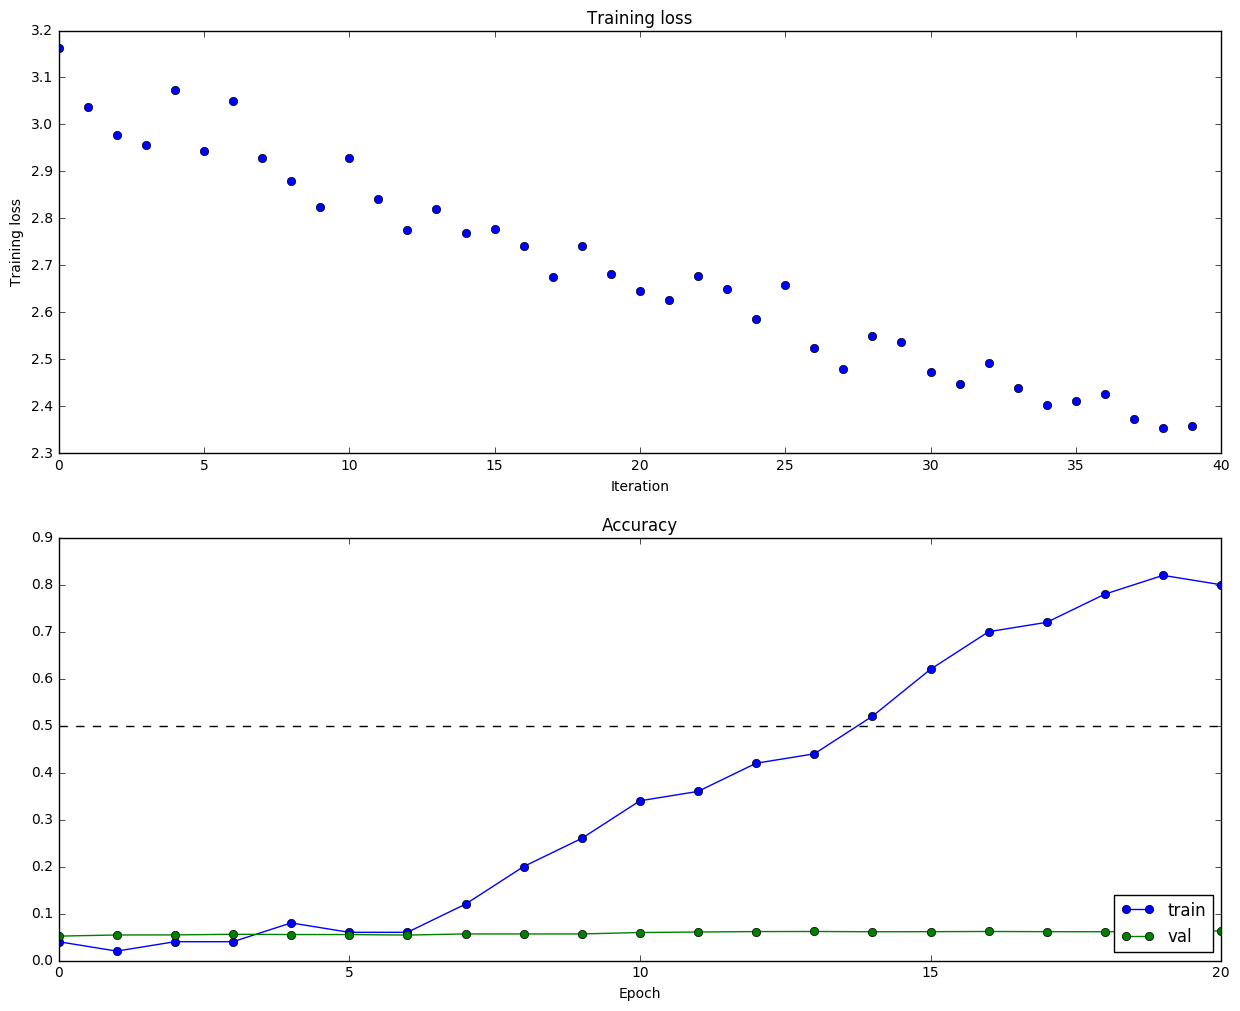

In [14]:
# TODO: Use a five-layer Net to overfit 50 training examples.

learning_rate = 5e-3
weight_scale = 5e-2
model = FullyConnectedNet([100, 100, 100, 100], num_classes=20, use_batchnorm=True,
                weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')
plt.ylabel('Training loss')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Update Rules [Slightly larger data]

In [15]:
num_train = 5000
r = np.random.choice(len(data['X_train']), num_train, replace=False)

small_data = {
  'X_train': data['X_train'][r],
  'y_train': data['y_train'][r],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

In [16]:
data['X_train'].shape

(18927, 32, 32, 3)

### SGD+Momentum

In [17]:
solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], num_classes=20, weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=20, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 1e-2,
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print()

running with  sgd
(Iteration 1 / 1000) loss: 4.212444
(Epoch 0 / 20) train acc: 0.045000; val_acc: 0.046326
(Iteration 11 / 1000) loss: 3.022204
(Iteration 21 / 1000) loss: 3.003834
(Iteration 31 / 1000) loss: 3.034852
(Iteration 41 / 1000) loss: 2.996198
(Epoch 1 / 20) train acc: 0.091000; val_acc: 0.083907
(Iteration 51 / 1000) loss: 2.885780
(Iteration 61 / 1000) loss: 2.979490
(Iteration 71 / 1000) loss: 2.859488
(Iteration 81 / 1000) loss: 2.853147
(Iteration 91 / 1000) loss: 2.948150
(Epoch 2 / 20) train acc: 0.106000; val_acc: 0.083163
(Iteration 101 / 1000) loss: 2.965909
(Iteration 111 / 1000) loss: 2.923985
(Iteration 121 / 1000) loss: 2.890249
(Iteration 131 / 1000) loss: 2.859155
(Iteration 141 / 1000) loss: 2.890527
(Epoch 3 / 20) train acc: 0.118000; val_acc: 0.098233
(Iteration 151 / 1000) loss: 2.845667
(Iteration 161 / 1000) loss: 2.964447
(Iteration 171 / 1000) loss: 2.781506
(Iteration 181 / 1000) loss: 2.901219
(Iteration 191 / 1000) loss: 2.756608
(Epoch 4 / 20) tr

### RMSProp and Adam

In [18]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], num_classes=20, weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=20, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print()

running with  adam
(Iteration 1 / 1000) loss: 5.352462
(Epoch 0 / 20) train acc: 0.045000; val_acc: 0.050605
(Iteration 11 / 1000) loss: 3.100959
(Iteration 21 / 1000) loss: 2.992033
(Iteration 31 / 1000) loss: 2.990990
(Iteration 41 / 1000) loss: 2.960208
(Epoch 1 / 20) train acc: 0.093000; val_acc: 0.088186
(Iteration 51 / 1000) loss: 2.947810
(Iteration 61 / 1000) loss: 2.975255
(Iteration 71 / 1000) loss: 2.986491
(Iteration 81 / 1000) loss: 3.022238
(Iteration 91 / 1000) loss: 2.994850
(Epoch 2 / 20) train acc: 0.072000; val_acc: 0.082419
(Iteration 101 / 1000) loss: 2.909064
(Iteration 111 / 1000) loss: 2.838013
(Iteration 121 / 1000) loss: 2.904535
(Iteration 131 / 1000) loss: 3.014215
(Iteration 141 / 1000) loss: 2.931538
(Epoch 3 / 20) train acc: 0.100000; val_acc: 0.100651
(Iteration 151 / 1000) loss: 2.838715
(Iteration 161 / 1000) loss: 2.886812
(Iteration 171 / 1000) loss: 2.698605
(Iteration 181 / 1000) loss: 2.892054
(Iteration 191 / 1000) loss: 2.848653
(Epoch 4 / 20) t

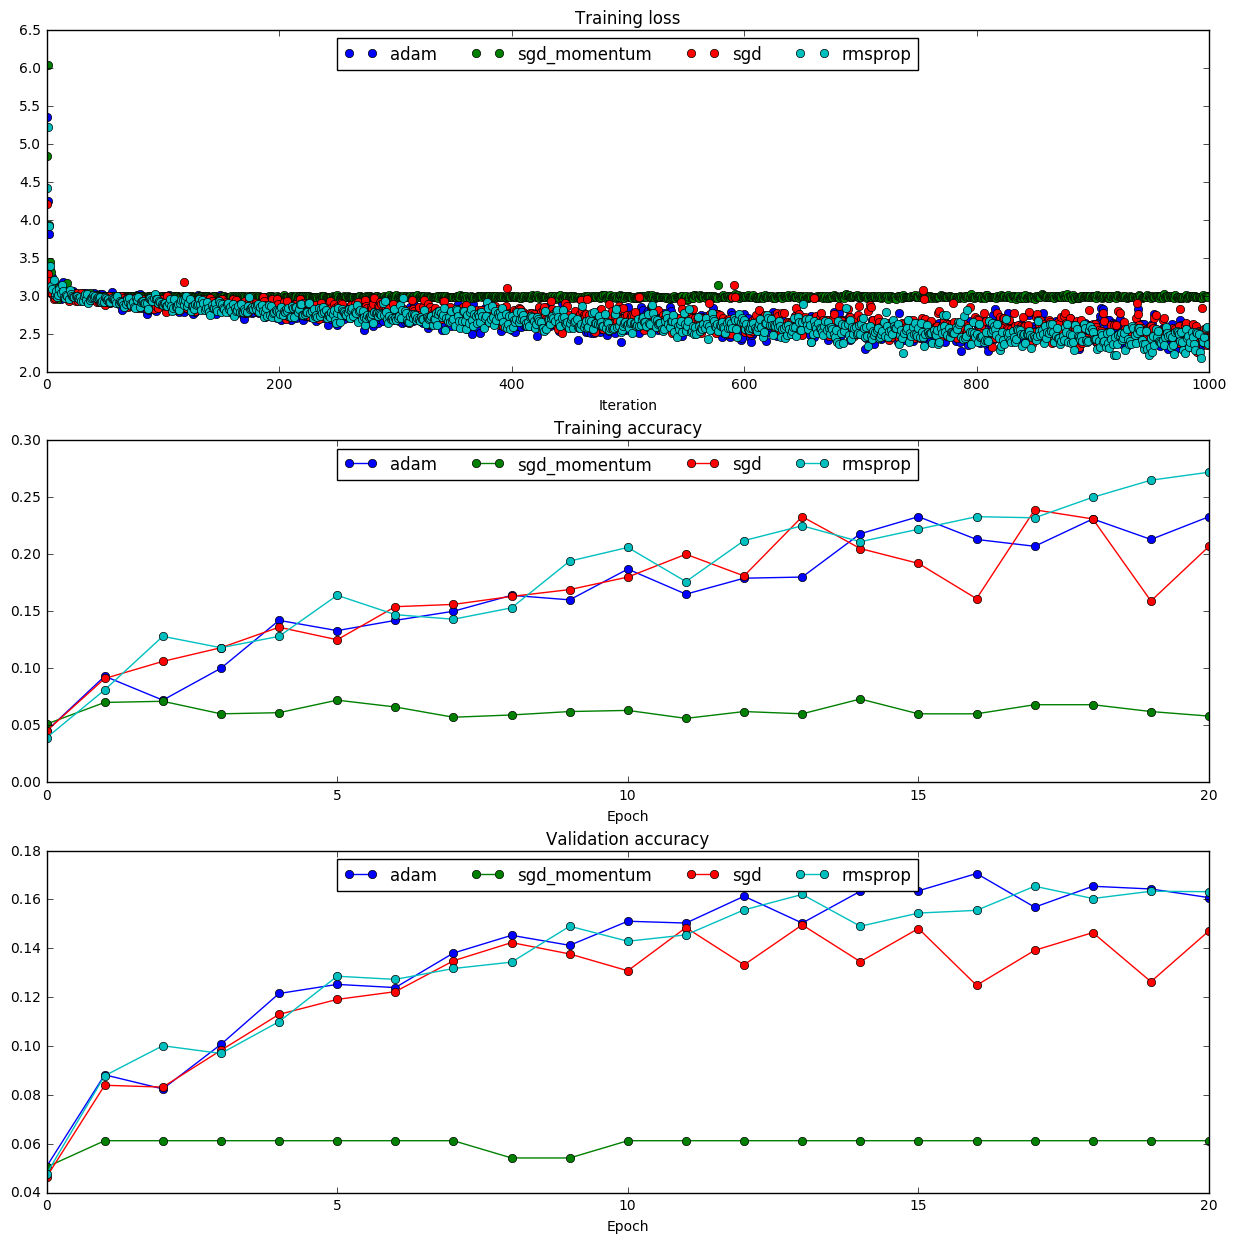

In [19]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# Train a good model!

In [20]:
best_model = None
best_val = -1   # The highest validation accuracy that we have seen so far.
best_solver = None

################################################################################
# TODO: Train the best FullyConnectedNet that you can on CIFAR-10. You might   #
# batch normalization and dropout useful. Store your best model in the         #
# best_model variable.                                                         #
################################################################################
pass

solvers = {}

update_rules_learning_rates = {'rmsprop4': 1e-4, 'adam3': 1e-3, 'adam2': 1e-2, 'sgd3':1e-3, 'sgd2':1e-2}

for update_rule in update_rules_learning_rates:
  print('running with ', update_rule)
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2, num_classes=20, use_batchnorm=True)

  solver = Solver(model, data,
                  num_epochs=20, batch_size=100,
                  update_rule=update_rule[:-1],
                  optim_config={
                    'learning_rate': update_rules_learning_rates[update_rule]
                  },
                  verbose=False)

  solver.train()
  solvers[update_rule] = solver
  #print()

  y_val_pred = np.argmax(model.loss(data['X_val']), axis=1)
  val_accuracy = (y_val_pred == data['y_val']).mean()
  print('{0} . Validation set accuracy: {1}'.format(update_rule, val_accuracy))
    
  if val_accuracy > best_val:
    best_val = val_accuracy
    best_model = model
    best_solver = solver

print('Best validation set accuracy: ', best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

running with  adam3
adam3 . Validation set accuracy: 0.1758139534883721
running with  sgd2
sgd2 . Validation set accuracy: 0.18846511627906976
running with  rmsprop4
rmsprop4 . Validation set accuracy: 0.19088372093023256
running with  adam2
adam2 . Validation set accuracy: 0.11311627906976744
running with  sgd3
sgd3 . Validation set accuracy: 0.1387906976744186
Best validation set accuracy:  0.19088372093


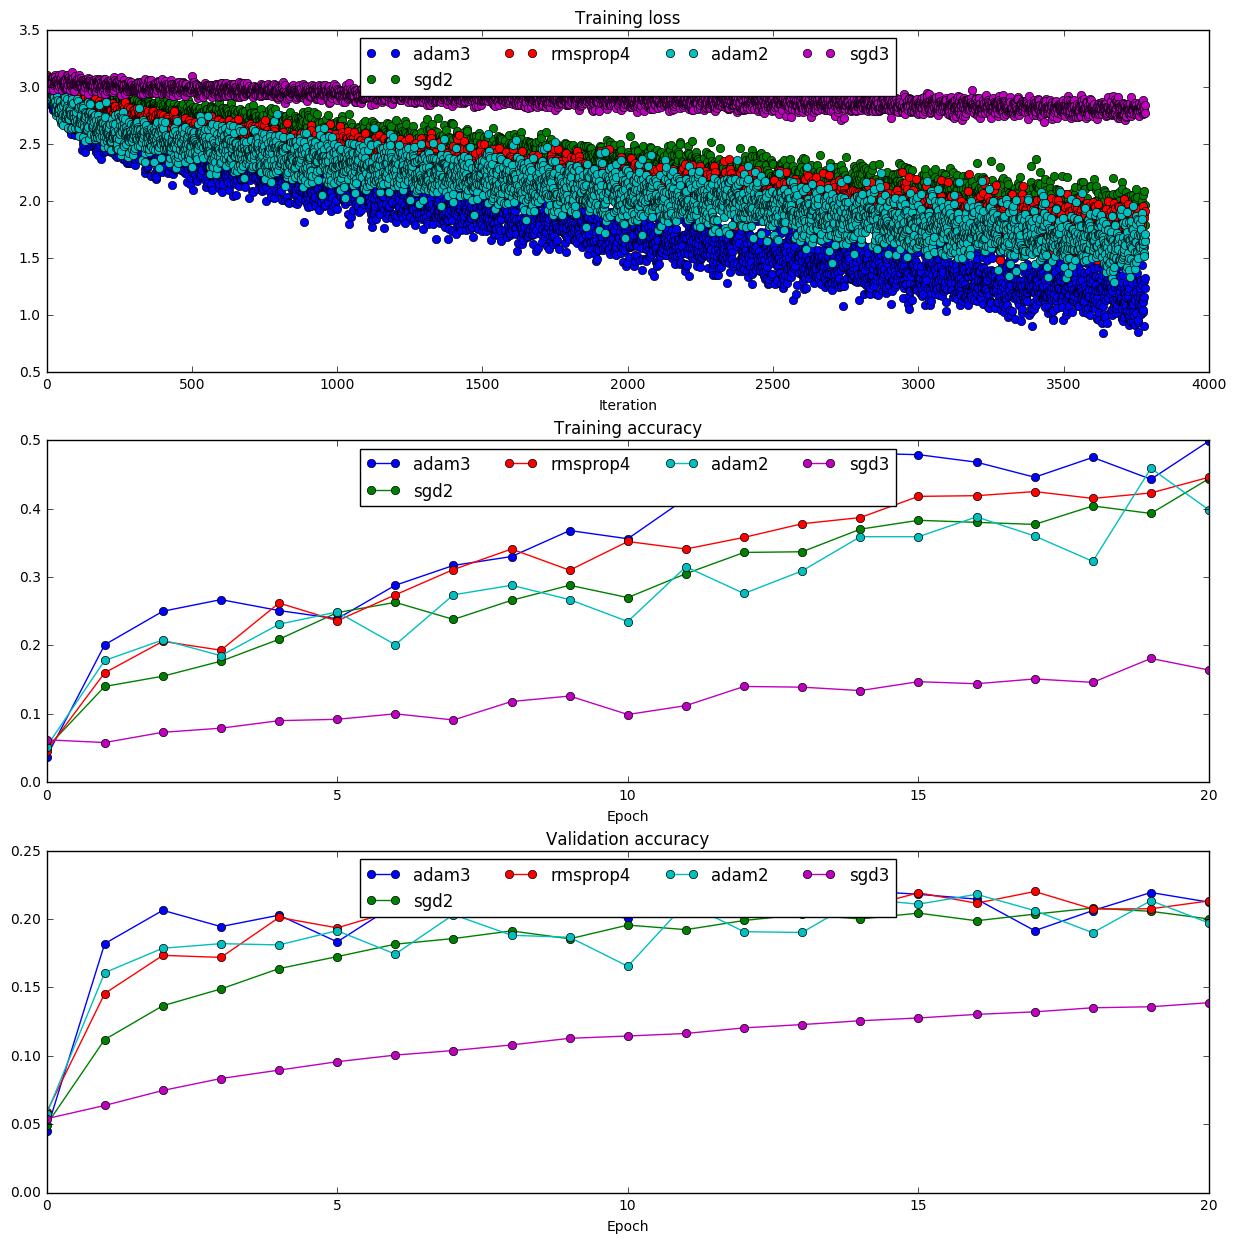

In [21]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in list(solvers.items()):
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Best Solver

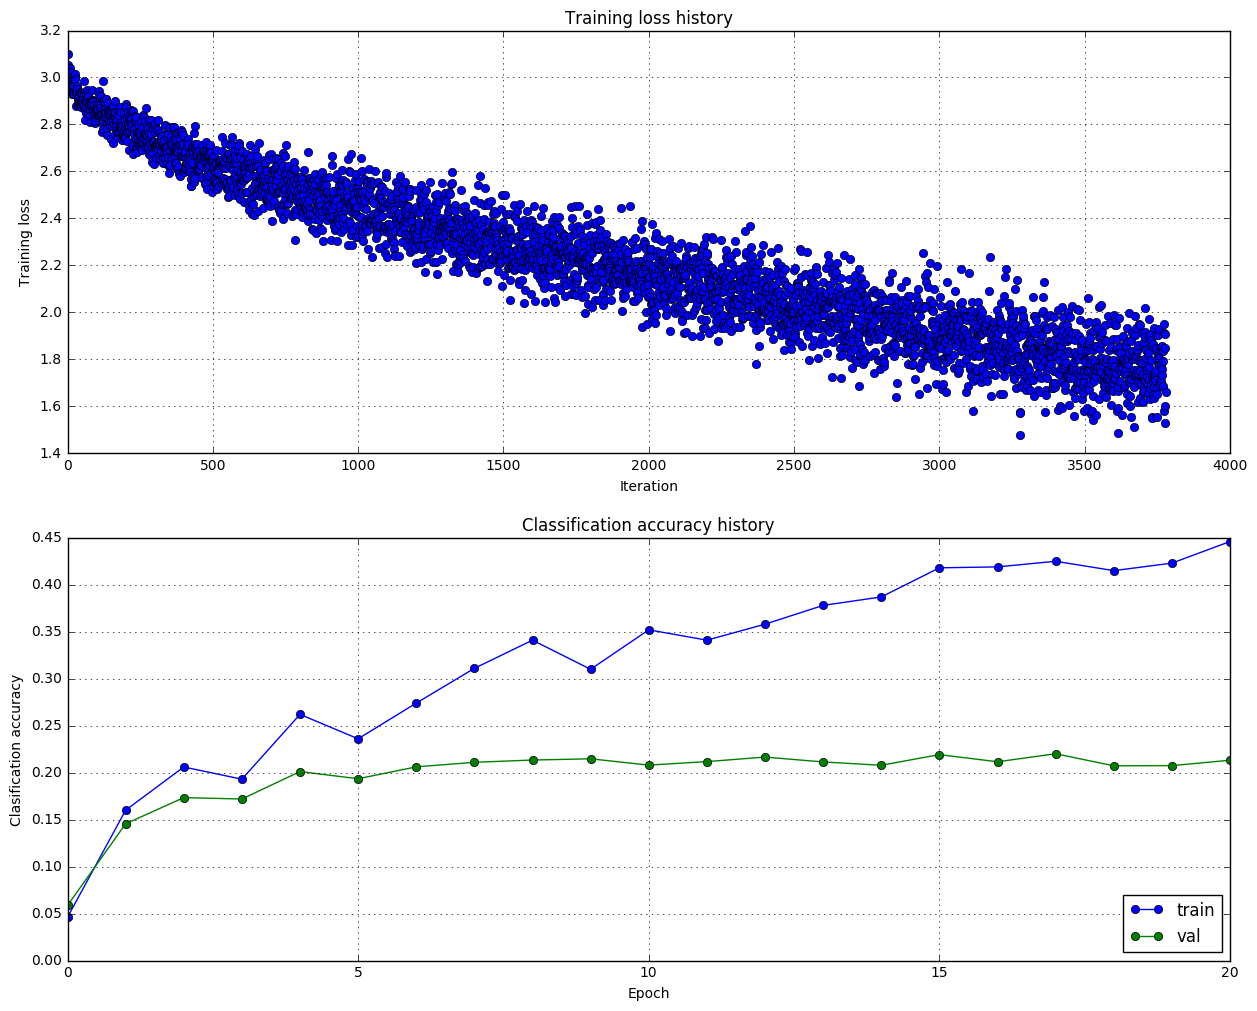

In [22]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.plot(best_solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(best_solver.train_acc_history, '-o', label='train')
plt.plot(best_solver.val_acc_history, '-o', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)

plt.savefig('assets/4_using_fullyconnected.png')
plt.show()

In [23]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.19088372093
Test set accuracy:  0.177479492916


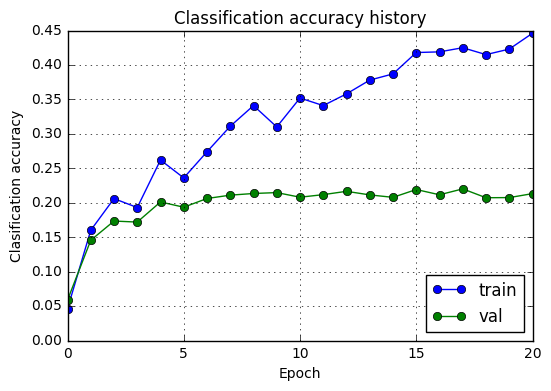

In [30]:
plt.plot(best_solver.train_acc_history, '-o', label='train')
plt.plot(best_solver.val_acc_history, '-o', label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.savefig('assets/fcfivelayer_rawpixels_classificationaccuracy.png')
plt.show()